In [11]:
import pandas as pd

In [18]:
df = pd.read_csv('data/train_imdb.csv')
df

,,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,Thriller,Reality-TV,Film-Noir,Sci-Fi,Horror,Romance,Music,Game-Show,Musical,Fantasy
0,4991,Black and White,Andrew Leman,60.0,47.0,2.0,5.0,David Mersault,19.0,,...,True,False,False,False,True,False,False,False,False,True
1,8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,...,False,False,False,True,False,False,False,False,False,False
2,3728,Color,Ice Cube,22.0,104.0,0.0,498.0,Monica Calhoun,1000.0,23031390.0,...,False,False,False,False,False,False,False,False,False,False
3,1108,Black and White,Oliver Stone,339.0,141.0,0.0,404.0,Shea Whigham,749.0,47307550.0,...,True,False,False,False,False,False,False,False,False,False
4,2686,Color,Catherine Owens,68.0,85.0,0.0,44.0,The Edge,468.0,10353690.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,1369,Color,Ben Affleck,378.0,150.0,0.0,206.0,Jon Hamm,10000.0,92173235.0,...,True,False,False,False,False,False,False,False,False,False
4030,4608,Color,Amat Escalante,87.0,105.0,50.0,8.0,Andrea Vergara,327.0,,...,False,False,False,False,False,True,False,False,False,False
4031,2138,Color,Richard LaGravenese,84.0,123.0,98.0,579.0,Scott Glenn,2000.0,36581633.0,...,False,False,False,False,False,False,False,False,False,False
4032,1422,Color,Randall Wallace,83.0,132.0,130.0,80.0,Anne Parillaud,29000.0,56876365.0,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.imdb_score

AttributeError: 'DataFrame' object has no attribute 'imdb_score'

- Le nombre de film en fonction de l'année et du score
- 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [15]:


# Assuming you have a DataFrame `df` with your data
features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']
# features = ["duration", "gross", "cast_total_facebook_likes"]
# features = ["director_facebook_likes", "gross", "cast_total_facebook_likes", "num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]

# Le plus ~ juste
# features = ["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "cast_total_facebook_likes", "director_facebook_likes"]

# every features of facebook
# features = ["actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "director_facebook_likes", "cast_total_facebook_likes", "movie_facebook_likes"]
# features_2 = ["gross", "budget", "title_year", "aspect_ratio", "facenumber_in_poster", "num_critic_for_reviews", "num_voted_users", "num_user_for_reviews"]

X = df[features]
y = df['imdb_score']

# X1 = df[features]
# X2 = df[features_2]

# Handle missing values
X = X.fillna(X.mean())
# X = X1.fillna((X1.mean() + X2.mean()) / 2)
y = y.fillna(y.mean())

# X1 = X1.fillna(X1.mean())
# X2 = X2.fillna(X2.mean())


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# use the model to predict the imdb score of every movie in the dataset
predictions = model.predict(X)
df['predicted_imdb_score'] = predictions
df[["movie_title", "imdb_score", "predicted_imdb_score"]].head(10)

KeyError: "None of [Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',\n       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',\n       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',\n       'num_user_for_reviews', 'budget', 'title_year',\n       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],\n      dtype='object')] are in the [columns]"

In [24]:
model.intercept_

5.190537014575918

In [25]:
model.coef_

array([1.03131074e-02, 2.10449721e-09, 2.60812115e-06])

In [ ]:
score = 5.19 + 0.0103 * duration + 2.1e-09 * gross + 2.6e-06 * cast_total_facebook_likes

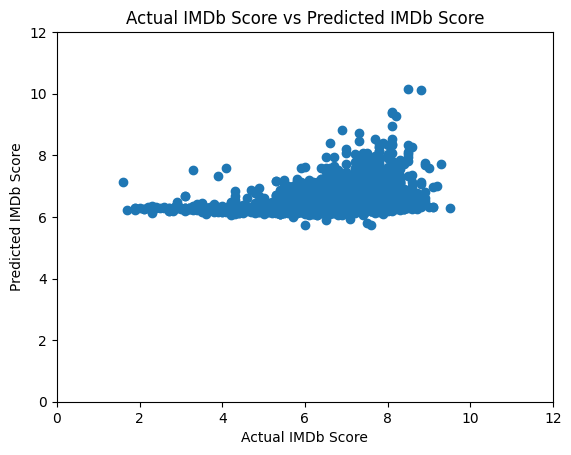

In [53]:
# display on a scatter plot the actual imdb score of the movies in the dataset vs the predicted imdb score
import matplotlib.pyplot as plt
plt.scatter(df['imdb_score'], df['predicted_imdb_score'])
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()

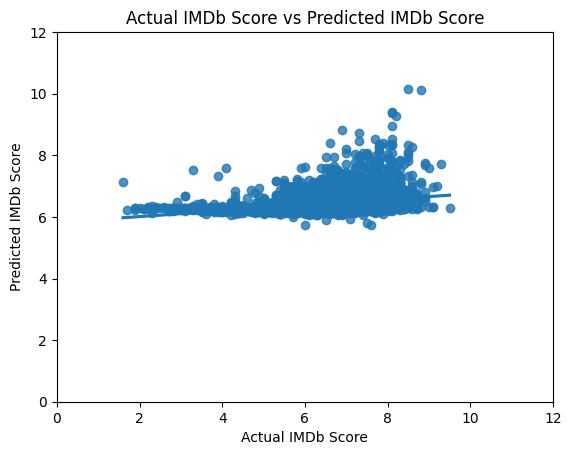

In [54]:
# display on a graph the actual imdb score of the movies in the dataset vs the predicted imdb score
import seaborn as sns
sns.regplot(x='imdb_score', y='predicted_imdb_score', data=df)
plt.xlabel('Actual IMDb Score')
plt.ylabel('Predicted IMDb Score')
plt.title('Actual IMDb Score vs Predicted IMDb Score')
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.show()
